# Mortgage Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv("capstone.csv")
test= pd.read_csv("test.csv.csv")

In [3]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [4]:
test.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [5]:
Test = test.drop(['row_id'], axis =1)

In [6]:
Data = pd.concat([train,Test], axis=1)
Data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [7]:
Data.to_csv("C:\\Users\Jasleen\Documents\Semester 4\Capstone Project 402\Project Files\Main\Data.csv")

## Data Overview

In [8]:
Data.shape

(500000, 23)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-

In [10]:
Data.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711635,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [11]:
Data.columns.tolist()

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant',
 'accepted']

In [12]:
Data.occupancy.unique()

array([1, 2, 3], dtype=int64)

## Data Cleaning

In [13]:
Data.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [14]:
data_clean = Data[Data.msa_md !=-1]
data_clean.columns.tolist()

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant',
 'accepted']

In [15]:
data_clean.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [16]:
data_clean=train.drop(['number_of_1_to_4_family_units','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','minority_population_pct'], axis=1)

In [17]:
data_clean["applicant_income"].fillna( method ='ffill', inplace = True)
data_clean["population"].fillna( method ='ffill', inplace = True)

In [18]:
data_clean.isnull().sum()

row_id                 0
loan_type              0
property_type          0
loan_purpose           0
occupancy              0
loan_amount            0
preapproval            0
msa_md                 0
state_code             0
county_code            0
applicant_ethnicity    0
applicant_race         0
applicant_sex          0
applicant_income       0
population             0
lender                 0
co_applicant           0
dtype: int64

In [19]:
data_clean.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,lender,co_applicant
0,0,3,1,1,1,70,3,18,37,246,2,5,1,24.0,6203.0,4536,False
1,1,1,1,3,1,178,3,369,52,299,1,5,1,57.0,5774.0,2458,False
2,2,2,1,3,1,163,3,16,10,306,2,5,1,67.0,6094.0,5710,False
3,3,1,1,1,1,155,1,305,47,180,2,5,1,105.0,6667.0,5888,True
4,4,1,1,1,1,305,3,24,37,20,2,3,2,71.0,6732.0,289,False


In [20]:
data_clean.to_csv("C:\\Users\Jasleen\Documents\Semester 4\Capstone Project 402\Project Files\Main\data_clean.csv")

## Visualization

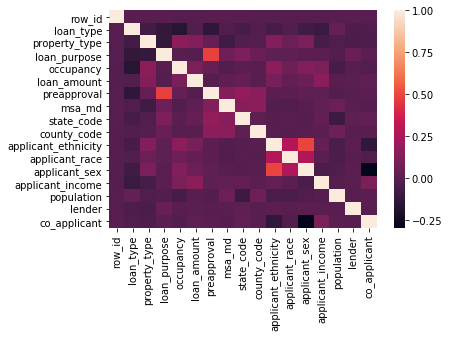

In [21]:
corr = data_clean.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [22]:
corr_array  = np.array(corr)

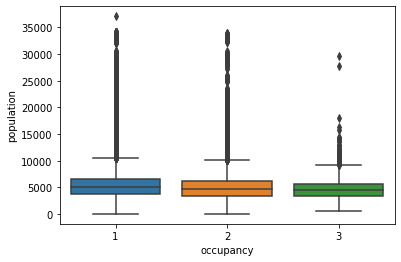

In [23]:
sns.boxplot(x='occupancy', y='population', data= data_clean)

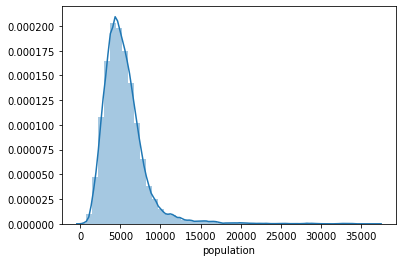

In [24]:
sns.distplot(data_clean['population'])

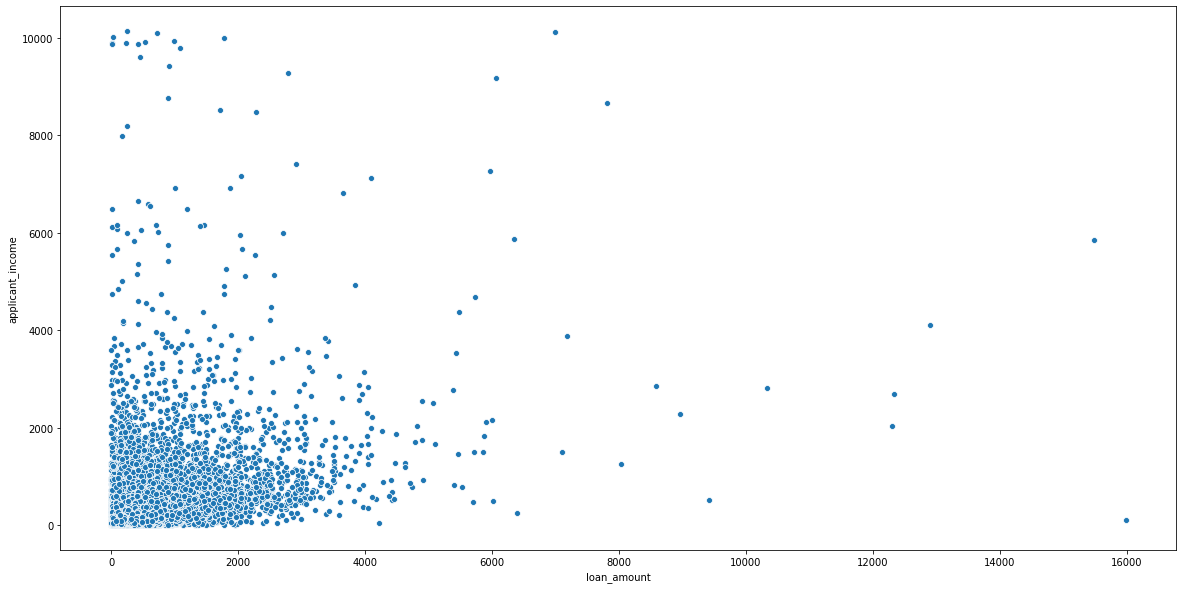

In [25]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data_clean['loan_amount'], train['applicant_income'])  ##, hue=data['Loan_Status'])##

## Model Building

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [27]:
Data= pd.concat([data_clean,test], axis=1)
Data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,lender,co_applicant,row_id,accepted
0,0,3,1,1,1,70,3,18,37,246,2,5,1,24.0,6203.0,4536,False,0,1
1,1,1,1,3,1,178,3,369,52,299,1,5,1,57.0,5774.0,2458,False,1,0
2,2,2,1,3,1,163,3,16,10,306,2,5,1,67.0,6094.0,5710,False,2,1
3,3,1,1,1,1,155,1,305,47,180,2,5,1,105.0,6667.0,5888,True,3,1
4,4,1,1,1,1,305,3,24,37,20,2,3,2,71.0,6732.0,289,False,4,1


## Train and Test Split

In [28]:
array = Data.values
X = array[:,6:11]
Y = array[:,12]
Y=Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)

## Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
predictions = model.predict(x_test)

In [32]:
print(accuracy_score(y_test, predictions))

0.6633


## Decision Tree

In [33]:
model = DecisionTreeClassifier()

In [34]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predictions = model.predict(x_test)

In [36]:
print(accuracy_score(y_test, predictions))

0.6738466666666667


## Random Forest

In [37]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [38]:
clf_rf = forest_model.fit(x_train,y_train)

In [39]:
predictions = forest_model.predict(X)

In [40]:
Random_forest = accuracy_score(predictions , Y)
Random_forest

0.681714

## Confusion Metrics

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_true=  y_test, y_pred = y_pred)
print(cm)

[[90208    14  4482    29]
 [40595    10  2256    17]
 [  423     4 10329     7]
 [    4     0     3  1619]]


In [42]:
accuracy_score(y_test, y_pred)

0.6811066666666666

Text(0, 0.5, 'True Label')

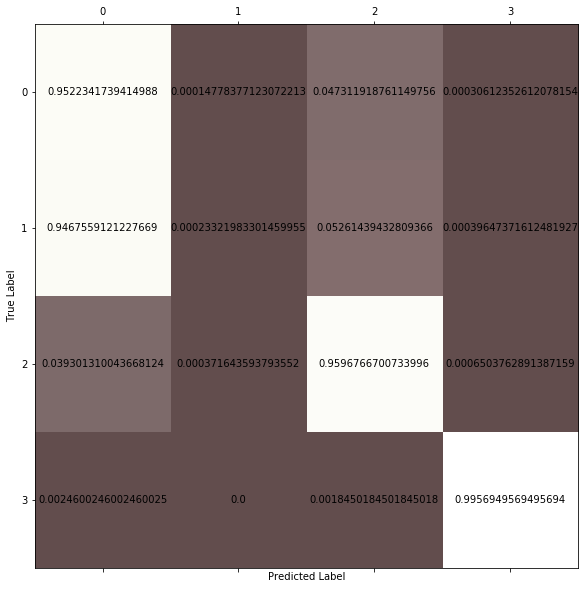

In [43]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.pink,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Feature Selection

### Model Based

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

select_rf = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=0),
    threshold="median")

In [46]:
select_rf.fit(x_train, y_train)
X_train_rf_15 = select_rf.transform(x_train)

print("X_train.shape: ",x_train)
print("X_train_rf_15.shape: ",X_train_rf_15)

X_train.shape:  [[3 10 34 79 2]
 [3 215 31 131 2]
 [3 333 6 60 3]
 ...
 [3 -1 -1 -1 1]
 [3 318 37 274 2]
 [3 -1 47 95 2]]
X_train_rf_15.shape:  [[34 79 2]
 [31 131 2]
 [6 60 3]
 ...
 [-1 -1 1]
 [37 274 2]
 [47 95 2]]


### Iterative for All, 15 and 25 Feature

In [47]:
from sklearn.feature_selection import RFE

select_rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=0),
             n_features_to_select=25)

select_rfe.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
  n_features_to_select=25, step=1, verbose=0)

In [48]:
X_train_RFE_25 = select_rfe.transform(x_train)
print("X_train.shape: {}".format(x_train.shape))
print("X_train_RFE_25.shape: {}".format(X_train_RFE_25.shape))

X_train.shape: (350000, 5)
X_train_RFE_25.shape: (350000, 5)


In [49]:
##  logistice regression for feature 15

X_test_rf_15 = select_rf.transform(x_test)
lr=LogisticRegression()
lr.fit(X_train_rf_15, y_train)
lr.score(X_test_rf_15, y_test)
print("Test score for Logistic Regression (15 features): ",lr.score(X_test_rf_15, y_test))


##  logistice regression for feature 25

X_test_RFE_25 = select_rfe.transform(x_test)
lr.fit(X_train_RFE_25, y_train)
lr.score(X_test_RFE_25, y_test)
print("Test score for Logistic Regression (25 features):",lr.score(X_test_RFE_25, y_test))


##  logistice regression for whole features

lr.fit(x_train, y_train)
lr.score(x_test, y_test)
print("Test score for Logistic Regression whole features:",lr.score(x_test, y_test))

Test score for Logistic Regression (15 features):  0.6677066666666667
Test score for Logistic Regression (25 features): 0.6633
Test score for Logistic Regression whole features: 0.6633


In [50]:
##   --------Decision Tree--------
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(min_impurity_decrease=0.01,random_state=0)

# all features

tree.fit(x_train,y_train)
tree.score(x_test,y_test)
print('Decision tree model accuracy for all features: ',tree.score(x_test,y_test))

# 25 features
tree.fit(X_train_RFE_25,y_train)
tree.score(X_test_RFE_25,y_test)
print('Decision tree model accuracy for 25 features: ',tree.score(X_test_RFE_25,y_test))

# 15 features
tree.fit(X_train_rf_15,y_train)
tree.score(X_test_rf_15,y_test)
print('Decision tree model accuracy for 15 features: ',tree.score(X_test_rf_15,y_test))

Decision tree model accuracy for all features:  0.6811733333333333
Decision tree model accuracy for 25 features:  0.6811733333333333
Decision tree model accuracy for 15 features:  0.6811733333333333


In [51]:
#--------------Random Forest-----------
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0,n_estimators=100)

# all features

rf.fit(x_train,y_train)
rf.score(x_test,y_test)
print('Random Forest model accuracy for all features: ',rf.score(x_test,y_test))

# 25 features

rf.fit(X_train_RFE_25,y_train)
rf.score(X_test_RFE_25,y_test)
print('Random Forest model accuracy for 25 features: ',rf.score(X_test_RFE_25,y_test))

# 15 features

rf.fit(X_train_rf_15,y_train)
rf.score(X_test_rf_15,y_test)
print('Random forest model accuracy for 15 features: ',rf.score(X_test_rf_15,y_test))

Random Forest model accuracy for all features:  0.6738933333333333
Random Forest model accuracy for 25 features:  0.6738933333333333
Random forest model accuracy for 15 features:  0.6764866666666667


## Cat-Boosting Algorithm

In [83]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=10, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(x_train, y_train,eval_set=(x_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6529296	test: 0.6510928	best: 0.6510928 (0)	total: 42.5ms	remaining: 383ms
1:	learn: 0.6315692	test: 0.6301097	best: 0.6301097 (1)	total: 76.6ms	remaining: 306ms
2:	learn: 0.6137189	test: 0.6125852	best: 0.6125852 (2)	total: 110ms	remaining: 258ms
3:	learn: 0.5988723	test: 0.5980127	best: 0.5980127 (3)	total: 143ms	remaining: 215ms
4:	learn: 0.5865481	test: 0.5859077	best: 0.5859077 (4)	total: 178ms	remaining: 178ms
5:	learn: 0.5763872	test: 0.5759357	best: 0.5759357 (5)	total: 220ms	remaining: 147ms
6:	learn: 0.5680217	test: 0.5677286	best: 0.5677286 (6)	total: 256ms	remaining: 110ms
7:	learn: 0.5611470	test: 0.5609791	best: 0.5609791 (7)	total: 288ms	remaining: 72ms
8:	learn: 0.5555038	test: 0.5554334	best: 0.5554334 (8)	total: 321ms	remaining: 35.7ms
9:	learn: 0.5508929	test: 0.5509020	best: 0.5509020 (9)	total: 360ms	remaining: 0us

bestTest = 0.5509020253
bestIteration = 9



In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)


def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train



def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.title('real_vs_predicted           .@achowdhu')
    plt.show()
    return plt

Lasso model:  0.0 * X1 + 0.0 * X0 + -0.0 * X2 + -0.0 * X3 + 0.0 * X4
Lasso model - Root Mean Square Error:  0.6760824693093537


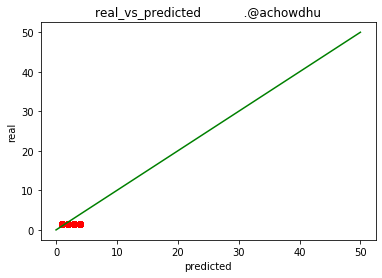

<module 'matplotlib.pyplot' from 'C:\\Users\\Jasleen\\Anaconda3\\envs\\DAB300\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [57]:
# Create lasso regression object
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(x_train, y_train)

print("Lasso model: ", pretty_print_linear(lasso.coef_, sort = True))

# Predict the values using the model
y_lasso_predict = lasso.predict(x_test)

# Print the root mean square error
print("Lasso model - Root Mean Square Error: ", root_mean_square_error(y_lasso_predict,y_test))
plot_real_vs_predicted(y_test,y_lasso_predict)

## Ridge Regression

Ridge model:  0.66 * X4 + 0.014 * X0 + -0.0 * X2 + 0.0 * X1 + -0.0 * X3
Ridge Regression - Root Mean Square Error:  0.5868488673845184


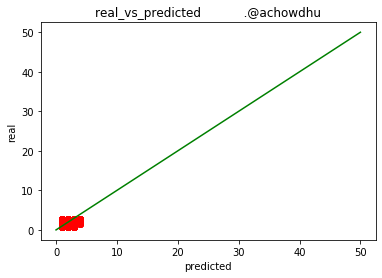

<module 'matplotlib.pyplot' from 'C:\\Users\\Jasleen\\Anaconda3\\envs\\DAB300\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [60]:
ridge = Ridge(fit_intercept=True, alpha=.3)

# Train the model using the training sets
ridge.fit(x_train, y_train)

print("Ridge model: ", pretty_print_linear(ridge.coef_, sort = True))

# Predict the values using the model
y_ridge_predict = ridge.predict(x_test)

# Print the root mean square error
print("Ridge Regression - Root Mean Square Error: ", root_mean_square_error(y_ridge_predict,y_test))
plot_real_vs_predicted(y_test,y_ridge_predict)

## Naive Bayes Model

In [61]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
# Predicting the Test set results 
y_pred = classifier.predict(x_test)

In [66]:
print(accuracy_score(y_test, y_pred))

0.68116


## Final Result

In [73]:
Final = np.array(y_test)
df = pd.DataFrame(data=Final)

In [76]:
final_results = pd.concat([df, Data.accepted], axis =1)

In [77]:
final_results['predicted_loan'] = predictions

In [78]:
final_results = final_results[[ 'accepted' ,'predicted_loan']].reset_index(drop = True)

In [79]:
final_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
accepted          500000 non-null int64
predicted_loan    500000 non-null int32
dtypes: int32(1), int64(1)
memory usage: 5.7 MB


In [80]:
final_results.head()

,accepted,predicted_loan
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
